In [2]:
import pandas as pd

import numpy as np


In [3]:
df = pd.read_csv("LungCapDataset")
df



,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [4]:
###Get frequency table using value count 
df["Smoke"].value_counts()

no     648
yes     77
Name: Smoke, dtype: int64

In [5]:
df["Smoke"].value_counts().sort_values()

yes     77
no     648
Name: Smoke, dtype: int64

In [6]:
df["Smoke"].value_counts().sort_values(ascending = False)

no     648
yes     77
Name: Smoke, dtype: int64

In [7]:
##find freq distribution of age column(it is quantitative)
df["Age"].value_counts()

13    69
12    68
15    64
11    58
14    56
16    54
10    51
18    43
17    43
8     41
9     40
19    37
7     37
6     25
5     20
3     13
4      6
Name: Age, dtype: int64

In [8]:
##sort them based on index
df["Age"].value_counts().sort_index()

3     13
4      6
5     20
6     25
7     37
8     41
9     40
10    51
11    58
12    68
13    69
14    56
15    64
16    54
17    43
18    43
19    37
Name: Age, dtype: int64

In [9]:
df["Age"].value_counts().sort_index(ascending = False)

19    37
18    43
17    43
16    54
15    64
14    56
13    69
12    68
11    58
10    51
9     40
8     41
7     37
6     25
5     20
4      6
3     13
Name: Age, dtype: int64

In [10]:
##using crosstab
pd.crosstab(index = df["Gender"], columns = "Count")

col_0,Count
Gender,
female,358
male,367


In [11]:
g = pd.crosstab(df["Gender"], columns = "Counts")

In [12]:
g.loc["male"]

col_0
Counts    367
Name: male, dtype: int64

In [13]:
##using df in columns:

gs = pd.crosstab(df["Gender"], columns = df["Smoke"])
gs


Smoke,no,yes
Gender,,
female,314,44
male,334,33


In [14]:
###find female smokers
gs.loc["female","yes"]

44

In [15]:
###find female smokers
gs.loc["female"]['yes']


44

In [28]:
####Grouped Frequency distribution

##Divide data into groups or ranges
##let's put them in ordinal scale
##Remember class intervals

max_age = df["Age"].max()
min_age = df["Age"].min()
range = max_age - min_age

print("The max age is ", max_age)
print("The min age is ", min_age)
print("The range of the age is ", range)


The max age is  19
The min age is  3
The range of the age is  16


In [16]:
###divide in bins say of size 5 or range
##range 10/ bins 5
##give them some names -- "Toddler","Child","Teen","Young_Adult"

## use cut()

df["AgeGrp"] = pd.cut(df["Age"], bins = [0,5,10,15,20],
                      labels = ["Toddler","Child","Teen","Young_Adult"])


In [17]:
df


,LungCap,Age,Height,Smoke,Gender,Caesarean,AgeGrp
0,6.475,6,62.1,no,male,no,Child
1,10.125,18,74.7,yes,female,no,Young_Adult
2,9.550,16,69.7,no,female,yes,Young_Adult
3,11.125,14,71.0,no,male,no,Teen
4,4.800,5,56.9,no,male,no,Toddler
...,...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no,Child
721,9.050,18,72.0,yes,male,yes,Young_Adult
722,3.850,11,60.5,yes,female,no,Teen
723,9.825,15,64.9,no,female,no,Teen


In [18]:
df["AgeGrp"].value_counts()

Teen           315
Child          194
Young_Adult    177
Toddler         39
Name: AgeGrp, dtype: int64

In [22]:
###binning lung cap
intervals  = pd.interval_range(start = 0,end =15, freq = 5)
##you can also pass bin count to value_counts
lc = df['LungCap'].value_counts(bins=intervals).sort_index(ascending = False)

In [30]:
###binning lung cap
intervals  = pd.interval_range(start = df['LungCap'].min(),end =df['LungCap'].max(), freq = 5)
##you can also pass bin count to value_counts
lc = df['LungCap'].value_counts(bins=intervals).sort_index(ascending = False)

In [31]:
lc


(5.507, 10.507]    466
(0.507, 5.507]     138
Name: LungCap, dtype: int64

In [20]:
smoker_age = pd.crosstab([df["AgeGrp"],df['Smoke']],columns = "Count")
smoker_age

col_0              Count
AgeGrp      Smoke       
Toddler     no        39
Child       no       190
            yes        4
Teen        no       277
            yes       38
Young_Adult no       142
            yes       35

In [36]:
pd.crosstab([df["Gender"],df['Smoke']],columns = "Count")

col_0         Count
Gender Smoke       
female no       314
       yes       44
male   no       334
       yes       33

In [37]:
df.groupby(["Smoke","Gender"]).count()

LungCap  Age  Height  Caesarean  AgeGrp
Smoke Gender                                         
no    female      314  314     314        314     314
      male        334  334     334        334     334
yes   female       44   44      44         44      44
      male         33   33      33         33      33

In [1]:
###find the frequency of lung capacity column for smokers and non-smokers
df['lungcap'] = pd.cut(df['LungCap'],bins = [0,5,10,14],labels = ["very_low","low","normal","large"])

NameError: name 'pd' is not defined

In [45]:
lung_cap = pd.crosstab([df["LungCap"],df['Smoke']],columns = "Count")
lung_cap


,col_0,Count
LungCap,Smoke,
0.507,no,1
1.025,no,1
1.125,no,1
1.175,no,1
1.325,no,1
...,...,...
13.375,no,3
13.875,no,1
14.375,no,1


In [32]:
smoke_gen = pd.crosstab([df["Gender"],df['Smoke']],columns = "Count")

In [33]:
smoke_gen

col_0         Count
Gender Smoke       
female no       314
       yes       44
male   no       334
       yes       33

In [41]:
a = smoke_gen.loc['female','yes']
a

col_0
Count    44
Name: (female, yes), dtype: int64

In [42]:
b = smoke_gen['Count'].sum()
b

725

In [47]:
##RELATIVE FREQUENCY OF FEMALE SMOKERS
print("The relative frequency of female: ",a/b)


The relative frequency of female:  col_0
Count    0.06069
Name: (female, yes), dtype: float64


In [44]:
##RELATIVE FREQUENCY OF MALE SMOKERS
aa = smoke_gen.loc['male','yes']
aa

col_0
Count    33
Name: (male, yes), dtype: int64

In [46]:
bb = smoke_gen['Count'].sum()
bb

725

In [50]:
##RELATIVE FREQUENCY OF MALE SMOKERS
print("The relative frequency of male: ",aa/bb)

The relative frequency of male:  col_0
Count    0.045517
Name: (male, yes), dtype: float64


In [51]:
##percentage freq
print("The relative frequency of male: ",aa/bb*100)

The relative frequency of male:  col_0
Count    4.551724
Name: (male, yes), dtype: float64


<AxesSubplot:xlabel='Age Groups', ylabel='Frequency'>

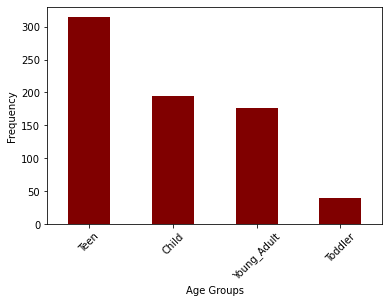

In [52]:
###PLOTS
##BAR PLOT

df['AgeGrp'].value_counts().plot.bar(xlabel = 'Age Groups',ylabel = 'Frequency',color = 'maroon',rot = '45')

Text(0, 0.5, 'Frequency')

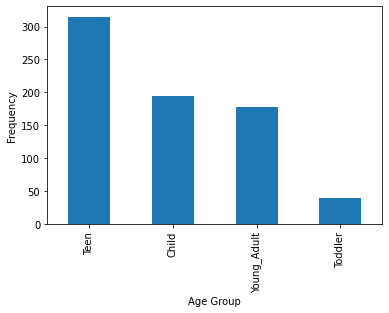

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
df['AgeGrp'].value_counts().plot.bar()
plt.xlabel("Age Group")
plt.ylabel("Frequency")

In [ ]:
##convert lungcap(quant) as lungcap(qualitative) then plot a barchart --> homework

<AxesSubplot:ylabel='% of smokers vs non smokers'>

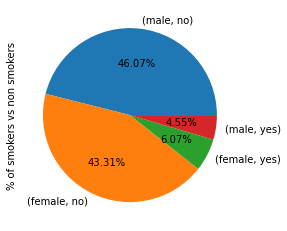

In [57]:
###pie
df[['Gender','Smoke']].value_counts().plot.pie(ylabel = '% of smokers vs non smokers',autopct = '%.2f%%')

<AxesSubplot:ylabel='Frequency'>

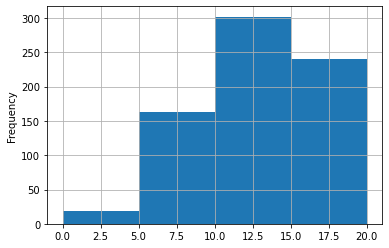

In [61]:
###histogram
df["Age"].plot.hist(xlabel = 'Age', ylabel = 'Freq',bins = [0,5,10,15,20],grid = True)

In [ ]:
This histogram is skewed
kurtosis is platykurtic

<AxesSubplot:ylabel='Frequency'>

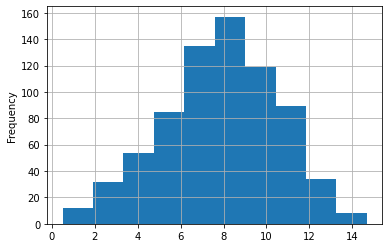

In [63]:
df["LungCap"].plot.hist(xlabel='LC', ylabel = 'Freq', grid = True)

In [65]:
df['LungCap'].kurt()+3

2.687593952083181

In [66]:
df['LungCap'].skew()

-0.22787342323500312

In [ ]:
It is less skewed